In [134]:
import numpy as np
from tools import *
from fitters import *
import seaborn as sns; sns.set_theme()
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(18,8)})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


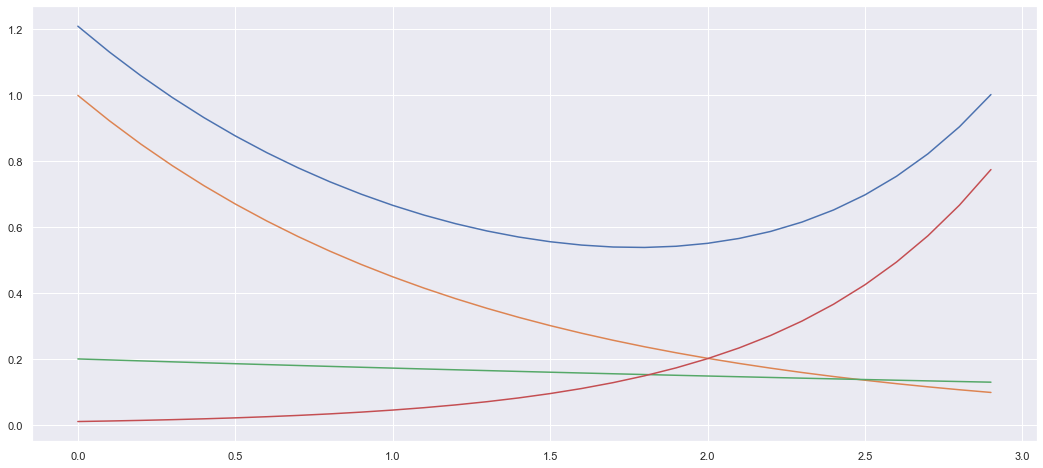

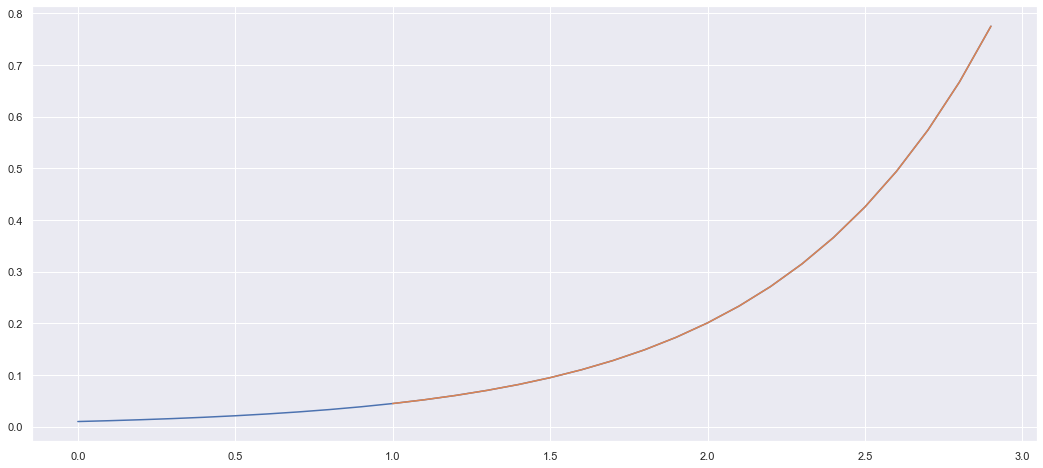

In [135]:
noise = 0.000001
N = 10


Exps = np.sort(np.array([1.5, -0.15, -0.8]))

N_max = 10
Ns = np.arange(3, N_max + 1, 3)
num_runs = 20
T = 2 * N_max

time = np.arange(0, 3, 0.1)
Inits = np.array([0.01, 0.2, 1])[::-1] #* (1 + 0 * 0.1 * np.random.randn(3))
Xseries = np.exp(time.reshape(-1, 1) * Exps.reshape(1, -1)) * Inits.reshape(
    1, -1
)

XseriesNoisy = Xseries * (1 + noise * np.random.randn(*Xseries.shape))
XsereisTotal = XseriesNoisy.sum(1)

plt.plot(time, XsereisTotal);
plt.plot(time, Xseries);
plt.show()

proj_series, evec = max_eig_project(XsereisTotal, N, shift=1)

X_target = XseriesNoisy[:, -1]

scalar = 1 / Xseries[N - 1, -1] *  proj_series[0]
scalar = 1/ np.mean(proj_series / X_target[len(X_target)-len(proj_series):])

plt.plot(time, X_target)
plt.plot(time[len(time)-len(proj_series):], proj_series*scalar)
plt.show()

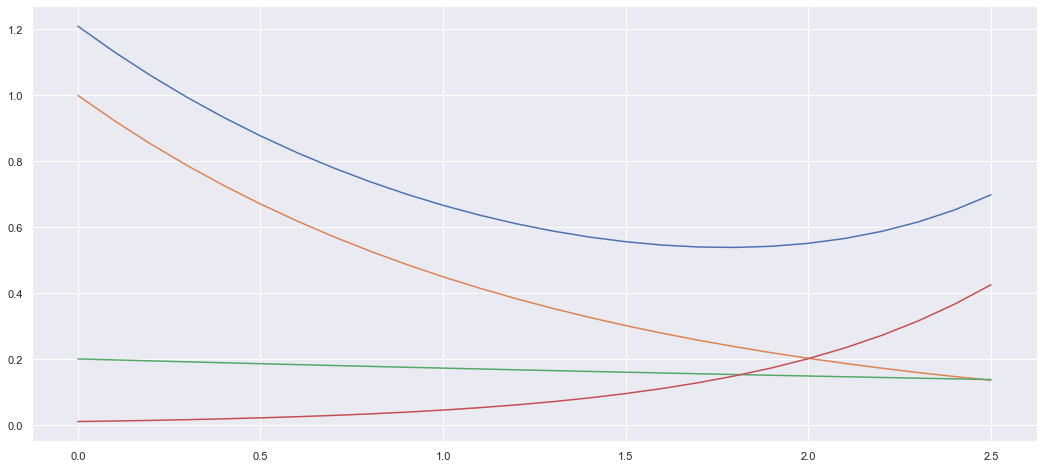

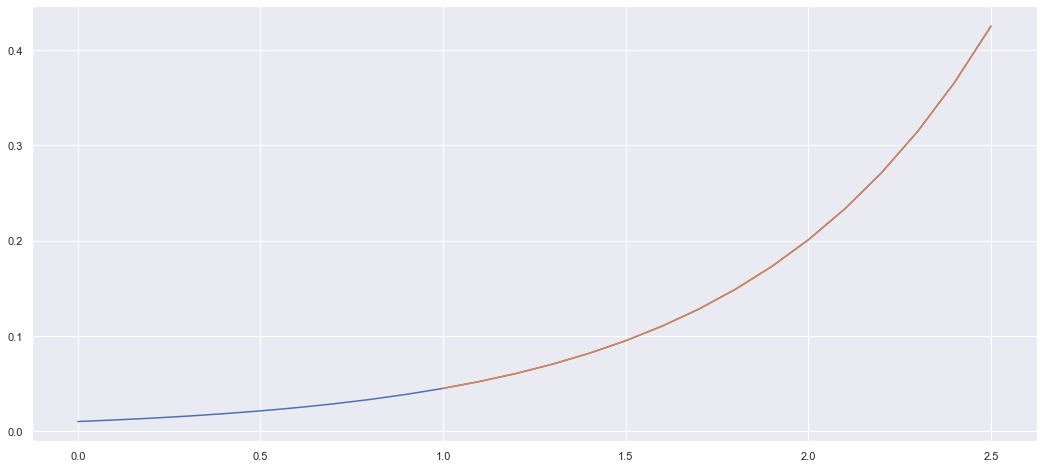

In [136]:
noise = 0.000001
N = 10


Exps = np.sort(np.array([1.5, -0.15, -0.8]))

N_max = 10
Ns = np.arange(3, N_max + 1, 3)
num_runs = 20
T = 2 * N_max
shifts = np.arange(1, 11, 3)
shift_max = max(shifts)

time = np.arange(0, 2.55, 0.1)
Inits = np.array([0.01, 0.2, 1])[::-1] #* (1 + 0 * 0.1 * np.random.randn(3))
Xseries = np.exp(time.reshape(-1, 1) * Exps.reshape(1, -1)) * Inits.reshape(
    1, -1
)

XseriesNoisy = Xseries * (1 + noise * np.random.randn(*Xseries.shape))
XsereisTotal = XseriesNoisy.sum(1)

plt.plot(time, XsereisTotal);
plt.plot(time, Xseries);
plt.show()

proj_series, evec = max_eig_project(XsereisTotal, N, shift=1)

X_target = XseriesNoisy[:, -1]

scalar = 1 / Xseries[N - 1, -1] *  proj_series[0]
scalar = 1/ np.mean(proj_series / X_target[len(X_target)-len(proj_series):])

plt.plot(time, X_target)
plt.plot(time[len(time)-len(proj_series):], proj_series*scalar)
plt.show()

In [196]:
exp_f = lambda x, e, a: a*np.exp(x*e)

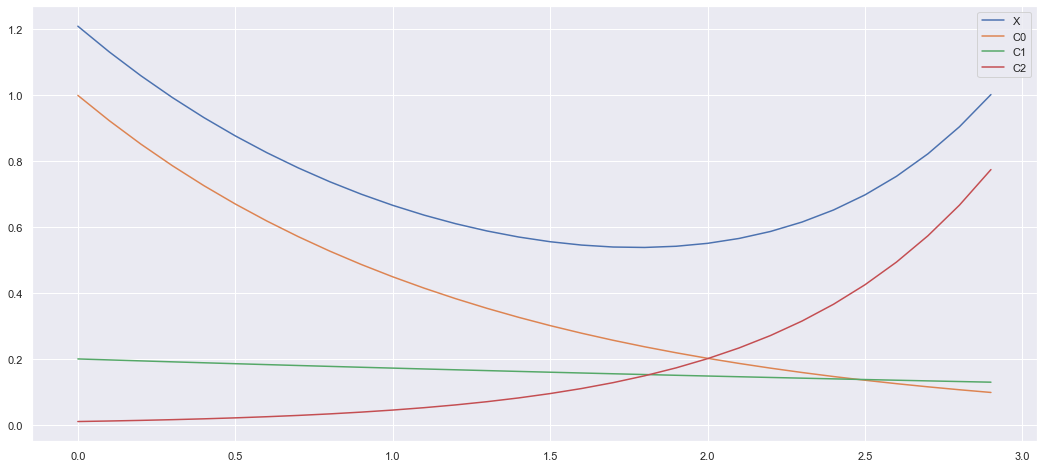

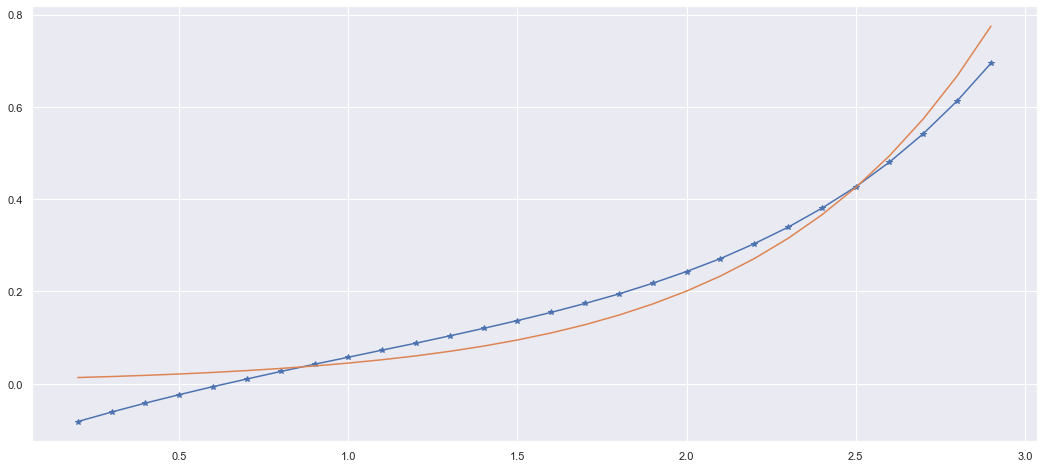

c_shift=False 0.0018415942663573932 a,bc -7.257662092720285 -0.15770110839861218 0


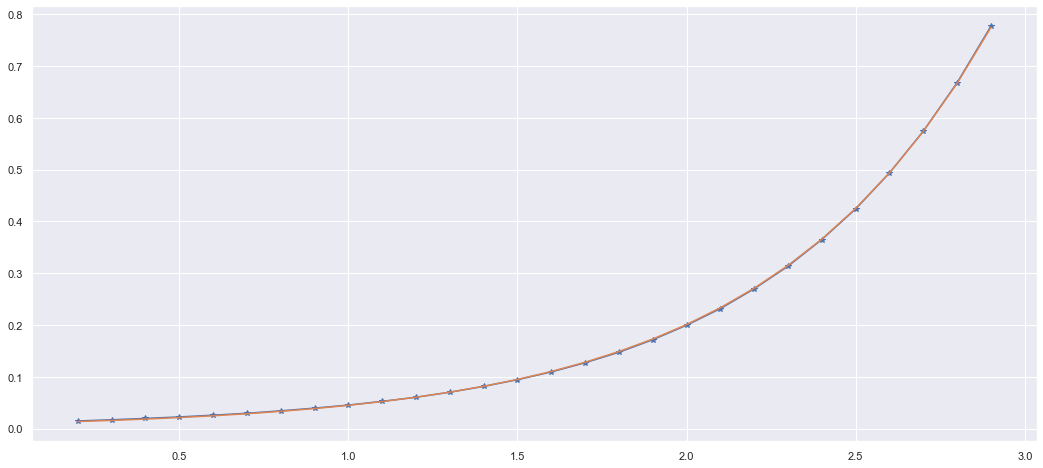

c_shift=True 1.2367701262997374e-06 a,b -7.9028201490949925 -0.9169597198225272 [[ 1.21981479e-13]
 [-2.59676160e-02]]


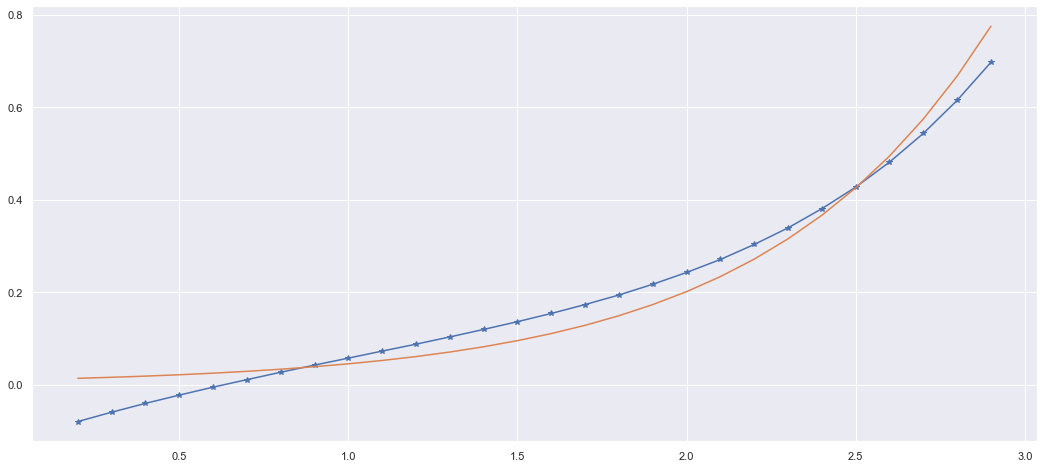

SingleCEigenModel 0.0017590124909779004 a,b,c -7.279052031927161 -0.17694624841755624 -0.012983807715458089


In [462]:
noise = 0.00001
exp_f = lambda x, e, a: a*np.exp(x*e)
time = np.arange(0, 3, 0.1)
e_s = np.array([-0.8, -0.15, 1.5])
a_s = np.array([1.0, 0.2, 0.01])

# e_s = np.random.uniform(-1,1, size=3)
# a_s = np.random.uniform(-1,1,size=3)

components = []
X = np.zeros_like(time)
for i in range(len(e_s)):
    c = exp_f(time, e_s[i], a_s[i]) + (noise * np.random.randn(len(X)))
    X += c
    components.append(c)


plt.plot(time, X, label='X');
[plt.plot(time, c, label=f'C{i}') for i,c in enumerate(components)]
plt.legend();plt.show()


model = EigenModel()
dim = 2
bias = 2


y_i = np.argmax(np.abs(e_s))
Y = components[y_i]
Y = Y[dim:]

c_shift= False
Xhan =  build_hankel(X+bias, dim)
pred, theta, (a, b, c, A) = model.train(Xhan, Y, dim, c_shift=c_shift)
plt.plot(time[dim:], pred, '-*')
plt.plot(time[dim:], Y)
plt.show()
error = mean_square_error(pred, Y)
print(f'c_shift={c_shift}', error, 'a,bc', a,b,c)

c_shift= True
Xhan =  build_hankel(X+bias, dim)
pred, theta, (a, b, c, A) = model.train(Xhan, Y, dim, c_shift=c_shift)
plt.plot(time[dim:], pred, '-*')
plt.plot(time[dim:], Y)
plt.show()
error = mean_square_error(pred, Y)
print(f'c_shift={c_shift}', error, 'a,b', a,b,c)


model = SingleCEigenModel()
Xhan =  build_hankel(X+bias, dim)
pred, theta, (a, b, c, A) = model.train(Xhan, Y, dim)
plt.plot(time[dim:], pred, '-*')
plt.plot(time[dim:], Y)
plt.show()
error = mean_square_error(pred, Y)
print(f'SingleCEigenModel', error, 'a,b,c', a, b, c)




In [531]:
# gut check

X = np.random.randn(3,3)
Y = X.copy()
A = ( Y @ X.T) @ np.linalg.inv((X @ X.T))
err = Y-(A @ X)
print(np.linalg.norm(err))
# print(A)


Y = X.copy()
X = X.copy() + 2000
A = ( Y @ X.T) @ np.linalg.inv((X @ X.T))
err = Y-(A @ X)
print(np.linalg.norm(err))
# print(A)

M = X.T @ np.linalg.inv((X@X.T)) @ X
S = np.ones_like(X)
c = (np.mean(Y) - np.mean(Y @ M)) / (1-np.mean(M))
A = ( (Y-c) @ X.T) @ np.linalg.inv((X @ X.T))
err = Y-(A @ X + c)
print('c', c)
print(np.linalg.norm(err))
print(M)


# A = np.linalg.lstsq(X.T, Y.T,rcond=-1)[0].T

7.76691320172108e-16
2.0787544914388826e-08
c -2.92686223918938e-09
2.5529340106496714e-08
[[ 9.99999989e-01 -5.17143081e-09  8.37727630e-09]
 [-9.46997113e-09  9.99999992e-01 -3.40528018e-09]
 [ 1.09686446e-08  3.56667661e-09  9.99999986e-01]]


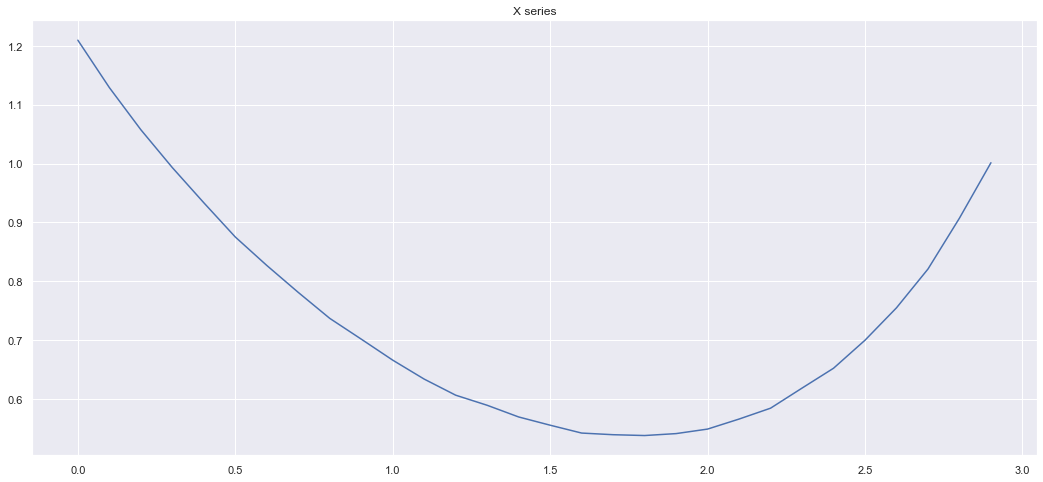

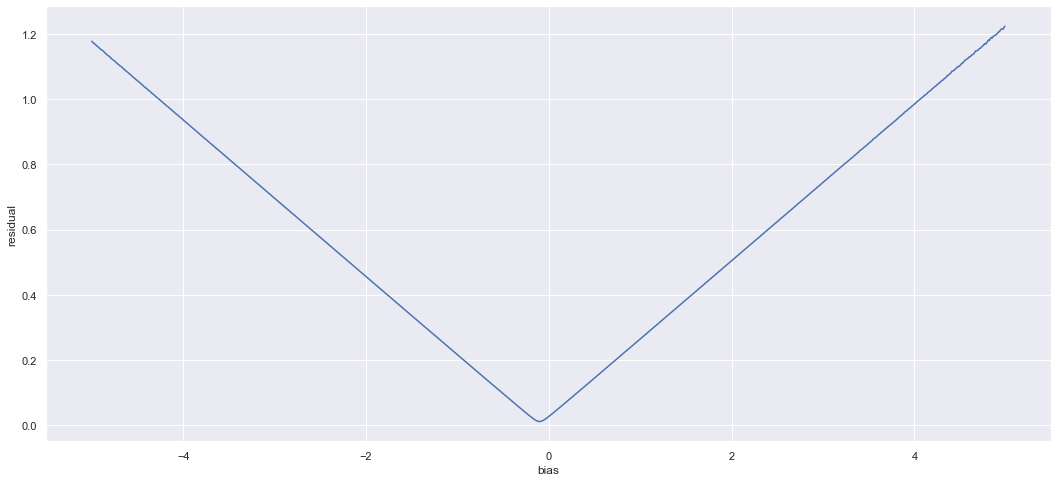

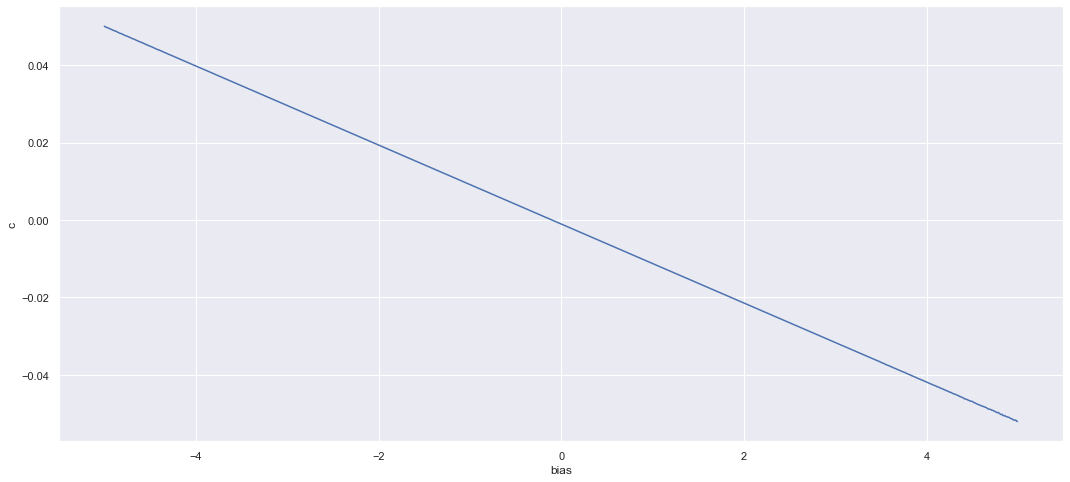

c factor -97.73749741074178


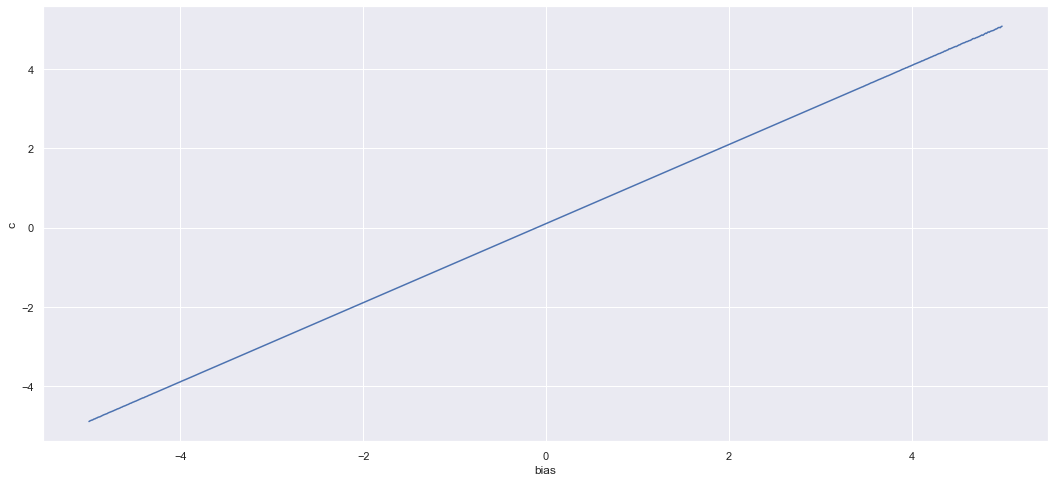

optimal bias -0.10000000000010445
bias where c is zero -0.10000000000010445


In [537]:
ress = []
bs = np.arange(-5,5,0.01)
cs = []
dim = 6
noise = 0.001
exp_f = lambda x, e, a: a*np.exp(x*e)
time = np.arange(0, 3, 0.1)
e_s = np.array([-0.8, -0.15, 1.5])
a_s = np.array([1.0, 0.2, 0.01])
# e_s = np.random.uniform(-1,1, size=3)
# a_s = np.random.uniform(-1,1,size=3)
components = []
origialX = np.zeros_like(time)
for i in range(len(e_s)):
    c = exp_f(time, e_s[i], a_s[i]) + (noise * np.random.randn(len(origialX)))
    origialX += c
    components.append(c)
plt.plot(time,origialX)
plt.title('X series'); plt.show()


# Xhan =  build_hankel(origialX, dim)
# X0 = Xhan[:, :-1].copy()
# Xp = Xhan[:, 1:].copy()
# A_0 = np.linalg.lstsq((Xp-c).T, X0.T,rcond=-1)[0]
# diff = Xp-(A_0 @ X0 )
# print('start res', np.linalg.norm(diff))
# a_diffs = []
for b in bs:

    X = origialX.copy()
    X += b

    Xhan =  build_hankel(X, dim)
    X0 = Xhan[:, :-1].copy()
    Xp = Xhan[:, 1:].copy()

    M = X0.T @ np.linalg.inv((X0@X0.T)) @ X0
    S = np.ones_like(X0)
    c = (np.mean(Xp) - np.mean(Xp @ M)) / (1-np.mean(S@M))
    cs.append(c)

    A = ( (Xp-c) @ X0.T) @ np.linalg.inv((X0 @ X0.T))
    
    diff = Xp-(A @ X0 -c)
    # diff = np.mean(diff, axis=0)
    res = np.linalg.norm(diff)
    ress.append(res)
    # a_diffs.append(np.linalg.norm(A-A_0))
    # print(f'bias {b}, residual', res)

cs = np.array(cs)

# plt.plot(bs, a_diffs);
# plt.xlabel('bias'); plt.ylabel('A Diff norm'); plt.show()

plt.plot(bs, ress);
plt.xlabel('bias'); plt.ylabel('residual'); plt.show()
plt.plot(bs, cs);
plt.xlabel('bias'); plt.ylabel('c'); plt.show()

slope = np.mean(np.diff(cs)) / 0.01
print('c factor', 1/slope)
plt.plot(bs, cs*(1/slope));
plt.xlabel('bias'); plt.ylabel('c'); plt.show()
print('optimal bias', bs[np.argmin(ress)])
print('bias where c is zero', bs[np.argmin(np.abs(cs))])

In [378]:
1/164.0814153535943

0.006094535434406188

In [379]:
Xhan =  build_hankel(X, dim)
X0 = Xhan[:, :-1].copy()
Xp = Xhan[:, 1:].copy()

M = X0.T @ np.linalg.inv((X0@X0.T)) @ X0
S = np.ones_like(M)

In [394]:
print(np.mean(Xhan))
print(np.mean(M))
print(np.mean(X0))
print(np.mean(X0@X0.T)   )
print(np.mean(X0@X0.T))
print(np.mean(np.linalg.inv((X0@X0.T))))
print(np.mean(Xp))
print(1/np.sqrt(np.prod(S.shape)))


5.709118437871312
0.037014335216331753
5.70376307941441
879.249944396174
0.00032701102751353517
5.692386582297395
0.037037037037037035
